In [1]:
## Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [2]:
## Dimensional operators
cav_dim = 10 # types of photons there can exist (thermal or participaitn gin excitation)
atm_dim = 2 # energy levels in atom, 2 for TLS
I_cav = qeye(cav_dim) # identity matrix matching dimension of radiation field
I_atom = qeye(atm_dim) # identity matrix matching dimension of spin system

## Atomic spin system operators
sigmap = tensor(sigmap(), I_cav)
sigmam = tensor(sigmam(), I_cav)
sigmaz = tensor(sigmaz(), I_cav)

## Photon operators
adag = tensor(I_atom, create(cav_dim)) # order of arguments is important and is consistant with the spin operators                
a = tensor(I_atom, destroy(cav_dim))

## Physical constants
N = 7e14 # number of two-level systems
wa = 2 * np.pi * 1.45e3 # atom transition frequency (w_excited - w_ground) (MHz) allows is to work in micro seconds
wc = 2 * np.pi * 1.45e3 # cavity frequency with vacuum field energy set to zero (zero-point energy) (MHz)
gs = 2 * np.pi * 0.042e-6 # single spin–photon coupling strength (MHz)
g = 1.0 #2 * np.pi * 1.1 # test spin-photon couling strength ~ np.sqrt(tls_num)*g, experimetnally it's 1.1 though. 

Kc =  0.05 #2 * np.pi * 0.18 # cavity mode decay rate (MHz)
Ks =  0.05 #2 * np.pi * 0.11 # spin dephasing rate (MHz)
gamma = 0.2 #2 * np.pi * 0.0177 # spin-lattice relaxation rate (MHz)

# Tuneable parameters
use_rwa = True # set = True to use Rotating Wave Approximation
n_th = 0 # avg number of thermal bath excitation (nhf=kT)

## Initial quantum states
psi_atm = np.sqrt(0)*basis(2, 0) + np.sqrt(1)*basis(2, 1) # atom initially stat in ground state
psi_phot = np.sqrt(1)*fock(cav_dim, 5) # exactly 0 photons in the cavity out of a possible 10
psi0 = tensor(psi_atm, psi_phot)

## Assembling the Hamiltonian
hbar = 1.0 # natural units
HA = 0.5 * hbar * wa * sigmaz # atomic part
HF = hbar * wc * (adag*a) # field part

if use_rwa:
    HI = hbar * (sigmap * a + sigmam * adag) # interaction part in the RWA
else:
    HI = hbar * ((sigmap + sigmam)*(a + adag)) # interaction part not using RWA
H = HA + HF + g*HI

## Collapse operators
c_ops = []

if n_th == 0.0:
    c_ops.append(np.sqrt(Kc) * a) # cavity relaxation at absolute zero 
else:
    c_ops.append(np.sqrt(Kc * n_th) * a) # cavity excitation, if temperature > 0               

#c_ops.append(np.sqrt(gamma) * sigmam) # spin relaxation
#c_ops.append(np.sqrt(Ks) * sigmaz) # spin dephasing

In [3]:
## simulation duration and master equation solver
time = 100
steps = 1000
tlist = np.linspace(0, time, steps)
result = mesolve(H, psi0, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


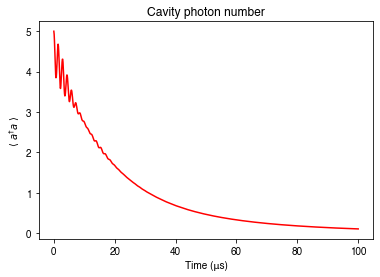

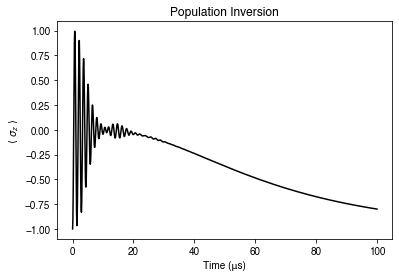

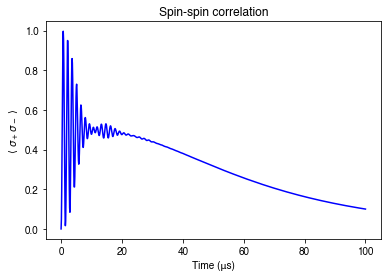

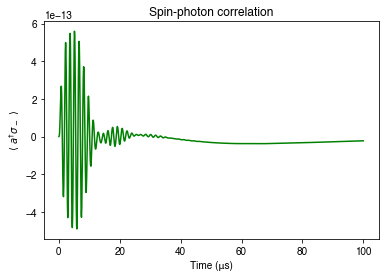

In [4]:
## Visualization 
plt.figure(1)
plt.plot(tlist, result.expect[0], 'r')
plt.title('Cavity photon number')
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('adag a.png', format = 'png', dpi = 900) 

plt.figure(2)
plt.plot(tlist, result.expect[1], 'k')
plt.title('Population Inversion')
plt.ylabel(r'$\langle\ \sigma_z \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('sigmaz.png', format = 'png', dpi = 900) 

plt.figure(3)
plt.plot(tlist, result.expect[2], 'b')
plt.title('Spin-spin correlation')
plt.ylabel(r'$\langle\ \sigma_+ \sigma_- \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('sigmap sigmam.png', format = 'png', dpi = 900) 

plt.figure(4)
plt.plot(tlist, result.expect[3], 'g')
plt.title('Spin-photon correlation')
plt.ylabel(r'$\langle\ a^\dag \sigma_- \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('adag sigmam.png', format = 'png', dpi = 900) 

plt.show()

In [6]:
coherent(cav_dim, 5)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[-0.34529899]
 [ 0.54544301]
 [-0.53707725]
 [ 0.40297496]
 [-0.27204876]
 [ 0.18519715]
 [-0.11874178]
 [ 0.08039145]
 [-0.04134595]
 [ 0.04288756]]